In [1]:
import pydot
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
class Graph:
    def __init__(self, vertices, edges, start, goal, weighted = False):
        '''
        edge is a tuple of vertices (node 1, node 2, cost)
        think this is already kind of a digraph?
        '''
        self.vertices, self.edges = {}, {}
        self.weighted = weighted
        self.visualization = edges
        self.start, self.goal = start, goal
        self.adjList = defaultdict(list)
        self.nx_graph = nx.Graph()
        self.initialize_params(vertices, edges)

    def visualize_graph(self):
        if (self.weighted == True):
            costs = nx.get_edge_attributes(self.nx_graph, 'weight')
            pos = graphviz_layout(self.nx_graph, prog = "dot", root = self.start)
            nx.draw_networkx_edge_labels(self.nx_graph, pos, edge_labels = costs, font_color = 'red')
            nx.draw_networkx(self.nx_graph, pos, with_labels = "True", alpha = 0.9, node_color = 'cyan')
        else:
            pos = graphviz_layout(self.nx_graph, prog = "dot", root = self.start)
            nx.draw_networkx(self.nx_graph, pos, with_labels = "True")
        plt.show()
        
    def create_adj_list(self, edges):
        for edge in edges:
            source = edge[0]
            destination = edge[1]
            self.adjList[source].append(destination)
            self.adjList[destination].append(source)
            
    def print_adj_list(self):
        for item in self.adjList.items():
            print(item)
    
    def create_node_dict(self, vertices):
        for vertex in vertices:
            try: node, heuristic = vertex
            except: node, heuristic = vertex, 0
            self.vertices[node] = heuristic
    
    def create_edge_dict(self, edges):
        for edge in edges:
            edge_name = (edge[0], edge[1])
            try:
                edge_cost = edge[2]
            except:
                edge_cost = 0
            self.edges[edge_name] = edge_cost
    
    def create_nx_graph(self):
        if (self.weighted == True):
            self.nx_graph.add_weighted_edges_from(self.visualization)
        else:
            self.nx_graph.add_edges_from(self.visualization)
    
    def initialize_params(self, vertices, edges):
        self.create_adj_list(edges)
        self.create_node_dict(vertices)
        self.create_edge_dict(edges)
        self.create_nx_graph()
    

In [3]:
from collections import deque
import queue
from copy import deepcopy

def get_path(current_position, previous_node):
    path = []
    while current_position in previous_node.keys() and current_position != None:
        path.append(current_position)
        current_position = previous_node[current_position]
    return path

In [ ]:
def BFS(graph: Graph):
    '''
    Input: the Graph graph
    Returns a frontier history, explore history, and path history. 
    Use history to visualize the frontier, path, and explored nodes at each step. 
    '''
    frontier_steps = []
    explored_steps = []
    start = graph.start
    goal = graph.goal
    explored = deque([start])
    frontier = deque([start])
    previous_node = {start: None}
    paths_history = []
    frontier_steps.append(deepcopy(frontier))
    explored_steps.append(deepcopy(explored))
    paths_history.append([])
    while len(frontier) != 0:
        current_node = frontier[0]
        frontier.popleft()
        if current_node == goal:
            frontier_steps.append(deepcopy(frontier))
            explored_steps.append(deepcopy(explored))
            paths_history.append(get_path(current_node, previous_node))
            return frontier_steps, explored_steps, paths_history       
        for node in graph.adjList[current_node]:
            if node not in explored:
                frontier.append(node)
                explored.append(node)
                previous_node[node] = current_node
        frontier_steps.append(deepcopy(frontier))
        explored_steps.append(deepcopy(explored))
        paths_history.append(get_path(current_node, previous_node))

In [4]:
def DFS(graph):
    '''
    Returns a frontier history, explore history, and path history. 
    Use history to visualize the frontier, path, and explored nodes at each step. 
    '''
    frontier_steps = []
    explored_steps = []
    start = graph.start
    goal = graph.goal
    explored = deque([start])
    frontier = deque([start])
    previous_node = {start: None}
    paths_history = []
    frontier_steps.append(deepcopy(frontier))
    explored_steps.append(deepcopy(explored))
    paths_history.append([])
    while len(frontier) != 0:
        current_node = frontier[-1]
        frontier.pop()
        if current_node == goal:
            frontier_steps.append(deepcopy(frontier))
            explored_steps.append(deepcopy(explored))
            paths_history.append(get_path(current_node, previous_node))
            return frontier_steps, explored_steps, paths_history       
        for node in graph.adjList[current_node]:
            if node not in explored:
                frontier.append(node)
                explored.append(node)
                previous_node[node] = current_node
        frontier_steps.append(deepcopy(frontier))
        explored_steps.append(deepcopy(explored))
        paths_history.append(get_path(current_node, previous_node))

In [ ]:
def a_star_search(graph: Graph):
    frontier_steps = []
    explored_steps = []
    path_history = []
    frontier = queue.PriorityQueue()
    start = graph.start
    previous_node = {start: None}
    cost_of_node = {start: 0}
    frontier.put((graph.vertices[start],start))
    frontier_steps.append([node[1] for node in frontier.queue])
    path_history.append([])
    explored_steps.append(list(cost_of_node.keys()))
    while not frontier.empty():
        current_position = frontier.get()[1]
        if current_position == graph.goal:
            frontier_steps.append([node[1] for node in frontier.queue])
            path_history.append(get_path(current_position, previous_node))
            explored_steps.append(list(cost_of_node.keys()))
            return frontier_steps, explored_steps, path_history
        for new_position in graph.adjList[current_position]:
            try:
                edge = (current_position, new_position)
                new_position_cost = cost_of_node[current_position] + graph.edges[edge]
            except:
                edge = (new_position, current_position)
                new_position_cost = cost_of_node[current_position] + graph.edges[edge]
            if new_position not in cost_of_node or new_position_cost < cost_of_node[new_position]:
                cost_of_node[new_position] = new_position_cost
                priority = new_position_cost + graph.vertices[new_position]
                frontier.put((priority, new_position))
                previous_node[new_position] = current_position
        frontier_steps.append([node[1] for node in frontier.queue])
        path_history.append(get_path(current_position, previous_node))
        explored_steps.append(list(cost_of_node.keys()))

In [ ]:
graph = Graph(['A', ('B', 6), ('C', 4), ('D',3)], [('A', 'B', 5), ('B', 'C', 4), ('B', 'D', 3)], 'A', 'C', weighted=True)
graph.visualize_graph()

In [ ]:
f_h, e_h, p_h = BFS(graph)

In [ ]:
from celluloid import Camera
from IPython.display import HTML

def animate_search(graph, f_h, e_h, p_h):
    '''
    inputs: Graph graph
    frontier history f_h: list of frontiers 
    explored history e_h: list of explored queues
    path history p_h: list of paths that the search is exploring at a given time
    '''
    fig = plt.figure()
    camera = Camera(fig)
    graph.visualize_graph()
    plt.draw()
    camera.snap()
    for i in range(len(f_h)):
        color_map = []
        for node in graph.nx_graph:
            if node in p_h[i]: 
                color_map.append('green')
            elif node in f_h[i]:
                color_map.append('yellow')
            elif node in e_h[i]:
                color_map.append('purple')
            else:
                color_map.append('cyan')
        if graph.weighted == True:
            costs = nx.get_edge_attributes(graph.nx_graph, 'weight')
            pos = graphviz_layout(graph.nx_graph, prog = "dot", root = graph.start)
            nx.draw_networkx_edge_labels(graph.nx_graph, pos, edge_labels = costs, font_color = 'red')
            nx.draw_networkx(graph.nx_graph, pos, with_labels = "True", alpha = 0.9, node_color=color_map)
            plt.draw()
            camera.snap()
        else:
            pos = graphviz_layout(graph.nx_graph, prog = "dot", root = graph.start)
            nx.draw_networkx(graph.nx_graph, pos, with_labels = "True", node_color=color_map)
            plt.draw()
            camera.snap()
    animation = camera.animate(interval=500, repeat=True)
    return animation

def save_animation(animation, filename):
    animation.save(filename)


In [ ]:
animation = animate_search(graph, f_h, e_h, p_h)
save_animation(animation, "BFS-test.mp4")
HTML(animation.to_html5_video())

In [ ]:
%matplotlib

## 4. Iterative Deepening

In [5]:
from typing import List, Union, Tuple, Deque, Set, Optional
Point = Union[int, str]
Trace = List[Point]

In [6]:
def interative_deepening(graph: Graph) -> Tuple[Optional[Trace], List[Deque[Point]], List[Set[Point]], List[Trace]]:
    """
    Uses the iterative deepening algorithm to search for a path from `graph.start` to `graph.goal`.

    Parameters:
    - graph: A Graph object representing the graph to search.

    Returns:
    - If a path is found, returns a Trace object containing the path from `graph.start` to `graph.goal`.
    - If no path is found, returns None.

    The function uses the depth-first search (DFS) algorithm to implement iterative deepening. Each iteration starts at `graph.start`
    and increases the depth limit until it reaches the depth limit of all nodes in the graph.
    For each iteration, the function calls the __dfs_with_limit helper function to perform a DFS search with a limited depth and store
    the search result in a trace list. If the search finds the goal node, it returns the trace list. Otherwise, the function increases
    the depth limit and continues to the next iteration until it finds the goal node or reaches the maximum depth limit.
    """
    # A helper function that performs a DFS search with a limited depth 
    # and returns a trace list of the search result.
    def __dfs_with_limit(cur_point: Point, deep: int, trace: Trace, frontier: Deque[Point], explored: Set[Point]) -> Tuple[Optional[Trace], List[Deque[Point]], List[Set[Point]], List[Trace]]: 
        frontier_steps, explored_steps, paths_history = [], [], []
        trace.append(cur_point)
        explored.add(cur_point)
        neighbours = graph.adjList.get(cur_point, [])

        frontier_steps.append(deepcopy(frontier))
        explored_steps.append(deepcopy(explored))
        paths_history.append(trace[:])

        if cur_point == graph.goal: 
            return trace, frontier_steps, explored_steps, paths_history
        if deep == 0 or len(neighbours) == 0: 
            return None, frontier_steps, explored_steps, paths_history
        for n in neighbours:
            if n in trace: continue
            frontier.append(n)
            found_trace, new_frontier_steps, new_explored_steps, new_paths_history = __dfs_with_limit(n, deep-1, trace.copy(), deepcopy(frontier), deepcopy(explored))
            if found_trace is not None: 
                frontier_steps.extend(new_frontier_steps)
                explored_steps.extend(new_explored_steps)
                paths_history.extend(new_paths_history)
                return found_trace, frontier_steps, explored_steps, paths_history
            frontier.remove(n)
        return None, frontier_steps, explored_steps, paths_history
    
    # Initialize depth variables
    cur_deep, max_deep = 0, len(graph.vertices)
    frontier, explored = deque([graph.start]), {graph.start}

    final_frontier_steps, final_explored_steps, final_paths_history = [], [], []

    # Iteratively perform DFS search with increasing depth limit
    while cur_deep != max_deep: 
        found, frontier_steps, explored_steps, paths_history = __dfs_with_limit(graph.start, cur_deep, list(), frontier.copy(), explored.copy())
        final_frontier_steps.extend(frontier_steps)
        final_explored_steps.extend(explored_steps)
        final_paths_history.extend(paths_history)
        if found is not None: return found, final_frontier_steps, final_explored_steps, final_paths_history
        cur_deep = cur_deep + 1
    # Return None if no path is found
    return None, final_frontier_steps, final_explored_steps, final_paths_history



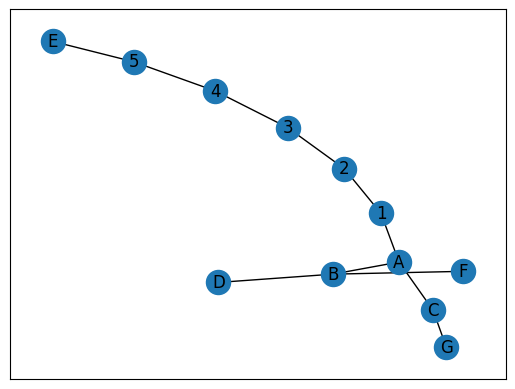

['A', 1, 2, 3, 4, 5, 'E']
[deque(['A']), deque(['A']), deque(['A']), deque(['A']), deque(['A']), deque(['A']), deque(['A']), deque(['A', 1]), deque(['A', 1, 2]), deque(['A', 1, 2, 3]), deque(['A', 1, 2, 3, 4]), deque(['A', 1, 2, 3, 4, 5]), deque(['A', 1, 2, 3, 4, 5, 'E'])]
[{'A'}, {'A'}, {'A'}, {'A'}, {'A'}, {'A'}, {'A'}, {1, 'A'}, {1, 2, 'A'}, {1, 2, 3, 'A'}, {1, 2, 3, 4, 'A'}, {1, 2, 3, 4, 5, 'A'}, {1, 2, 3, 4, 5, 'E', 'A'}]
[['A'], ['A'], ['A'], ['A'], ['A'], ['A'], ['A'], ['A', 1], ['A', 1, 2], ['A', 1, 2, 3], ['A', 1, 2, 3, 4], ['A', 1, 2, 3, 4, 5], ['A', 1, 2, 3, 4, 5, 'E']]


In [7]:
def test_iterative_deepening(): 
    test_graph = Graph(
        vertices=["A", "B", "C", "D", "E", "F", "G", 1, 2, 3, 4, 5], 
        edges=[
            ("A", "B"), ("A", "C"), ("A", 1), ("B", "D"), ("B", "F"), 
            ("C", "G"), (1, 2), (2, 3),(3, 4), (4, 5), (5, "E")
        ],
        start="A", goal="E", weighted=False
    )
    nx_graph = nx.Graph()
    nx_graph.add_edges_from(test_graph.visualization)
    nx.draw_networkx(nx_graph)
    plt.show()
    find_trace, frontier_steps, explored_steps, paths_history = interative_deepening(test_graph)
    print(find_trace)
    print(frontier_steps)
    print(explored_steps)
    print(paths_history)

test_iterative_deepening()

In [8]:
## 5. Beam Search

In [9]:
from typing import Callable, Dict, Iterator
EvalFunc = Callable[[Graph, Point], int]
degree_eval: EvalFunc = lambda graph, point : len(graph.adjList.get(point, []))
euclidean_eval = lambda g, p: -1 # TODO(NEED HAVE COORDIATION)
manhattan_eval = lambda g, p: -1 # TODO(NEED HAVE COORDIATION)

In [10]:
def beam_search(graph: Graph, width: int = 2, eval_func: EvalFunc = degree_eval) -> Optional[Trace]: 
    """
    Uses the beam search algorithm to search for a path from `graph.start` to `graph.goal`.

    Parameters:
    - graph: A Graph object representing the graph to search.
    - width: An integer representing the beam width.

    Returns:
    - If a path is found, returns a Trace object containing the path from `graph.start` to `graph.goal`.
    - If no path is found, returns None.

    The function uses the beam search algorithm to search for the shortest path from `graph.start` to `graph.goal`. The beam width
    determines the maximum number of candidate nodes to consider at each level of the search tree. The evaluation function is based
    on the number of neighboring nodes of a node. The function starts with the `graph.start` node and iteratively expands the most
    promising nodes in the beam until it finds the `graph.goal` node or no path is found within the beam width.
    """

    # Define the evaluation function and parent dictionary
    eval_func: EvalFunc = lambda p : len(graph.adjList.get(p, []))
    parent_of: Dict[Point, Point] = {graph.start: None}

    # Perform the beam search
    current_beam = {graph.start}
    while current_beam and graph.goal not in parent_of:
        next_beam = set()
        for point in current_beam:
            neighbors = {n for n in  graph.adjList.get(point, []) if n not in parent_of}
            for n in neighbors: parent_of[n] = point
            next_beam.update(neighbors)
        next_beam = sorted(next_beam, key=eval_func, reverse=True)[:width]
        current_beam = next_beam

    # Return the result trace or None if no path is found
    if graph.goal not in parent_of:return None
    trace = [graph.goal]
    while trace[0] != graph.start: 
        trace.insert(0, parent_of[trace[0]])
    return trace

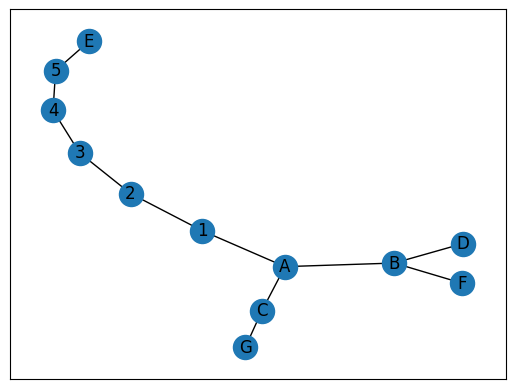

None


In [11]:
def test_beam_search(): 
    test_graph = Graph(
        vertices=["A", "B", "C", "D", "E", "F", "G", 1, 2, 3, 4, 5], 
        edges=[
            ("A", "B"), ("A", "C"), ("A", 1), ("B", "D"), ("B", "F"), 
            ("C", "G"), (1, 2), (2, 3),(3, 4), (4, 5), (5, "E")
        ],
        start="A", goal="E", weighted=False
    )
    nx_graph = nx.Graph()
    nx_graph.add_edges_from(test_graph.visualization)
    nx.draw_networkx(nx_graph)
    plt.show()
    find_trace = beam_search(test_graph)
    print(find_trace)

test_beam_search()

In [12]:
## 6. Hill Climbing
from typing import Set

In [13]:
def hill_climbing(graph: Graph, eval_func: EvalFunc = degree_eval, only_best: bool = True) -> Optional[Trace]:
    """
    Uses the Hill Climbing algorithm to search for a path from `graph.start` to `graph.goal`.

    Parameters:
    - graph: A Graph object representing the graph to search.
    - eval_func: An evaluation function to evaluate the quality of nodes (default is degree_eval).
    - only_best: A boolean indicating whether to consider only the best neighbour (default is True).
            If we following exactly the definition of the hill climbing, it will only find the best. 

    Returns:
    - If a path is found, returns a list containing the path from `graph.start` to `graph.goal`.
    - If no path is found, returns None.
    """
    def __dfs_with_best(cur_point: Point, trace: Trace) -> Optional[Trace]: 
        trace.append(cur_point)
        if cur_point == graph.goal: return trace
        neighbours = graph.adjList.get(cur_point, [])
        if len(neighbours) == 0: return None
        neighbours.sort(key=lambda p: eval_func(graph, p), reverse=True)
        if only_best: neighbours = [neighbours[0]]
        for n in neighbours: 
            if n in trace: continue
            found_trace = __dfs_with_best(n, trace.copy())
            if found_trace is not None: return found_trace
        return None
    return __dfs_with_best(graph.start, [])


def hill_climbing(graph: Graph, eval_func: EvalFunc = degree_eval, only_best: bool = True) -> Tuple[Optional[Trace], List[Deque[Point]], List[Deque[Point]], List[Trace]]:
    frontier_steps, explored_steps, paths_history = [], [], []

    def __dfs_with_best(cur_point: Point, trace: Trace, explored: Set[Point], frontier: Deque[Point]) -> Optional[Trace]:
        trace.append(cur_point)
        explored.add(cur_point)
        frontier.remove(cur_point)
        neighbours = graph.adjList.get(cur_point, [])
        neighbours.sort(key=lambda p: eval_func(graph, p), reverse=True)
        if only_best:
            neighbours = [neighbours[0]] if neighbours else []
        for n in neighbours:
            if n not in explored:
                frontier.append(n)
        frontier_steps.append(deepcopy(frontier))
        explored_steps.append(deepcopy(explored))
        path = trace.copy()
        paths_history.append(path)

        if cur_point == graph.goal:
            return trace
        if len(neighbours) == 0:
            return None

        for n in neighbours:
            if n in trace:
                continue
            found_trace = __dfs_with_best(n, trace.copy(), explored.copy(), frontier.copy())
            if found_trace is not None:
                return found_trace
        return None

    trace = __dfs_with_best(graph.start, [], set(), deque([graph.start]))
    return trace, frontier_steps, explored_steps, paths_history

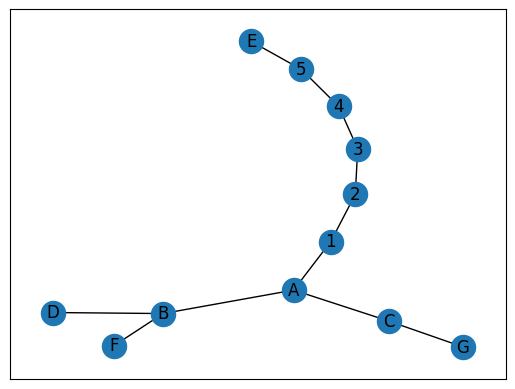

['A', 1, 2, 3, 4, 5, 'E']
[deque(['B', 'C', 1]), deque(['C', 1, 'D', 'F']), deque(['C', 1, 'F']), deque(['C', 1, 'D']), deque(['B', 1, 'G']), deque(['B', 1]), deque(['B', 'C', 2]), deque(['B', 'C', 3]), deque(['B', 'C', 4]), deque(['B', 'C', 5]), deque(['B', 'C', 'E']), deque(['B', 'C'])]
[{'A'}, {'B', 'A'}, {'D', 'B', 'A'}, {'F', 'B', 'A'}, {'C', 'A'}, {'C', 'G', 'A'}, {1, 'A'}, {1, 2, 'A'}, {1, 2, 3, 'A'}, {1, 2, 3, 4, 'A'}, {1, 2, 3, 4, 5, 'A'}, {1, 2, 3, 4, 5, 'E', 'A'}]
[['A'], ['A', 'B'], ['A', 'B', 'D'], ['A', 'B', 'F'], ['A', 'C'], ['A', 'C', 'G'], ['A', 1], ['A', 1, 2], ['A', 1, 2, 3], ['A', 1, 2, 3, 4], ['A', 1, 2, 3, 4, 5], ['A', 1, 2, 3, 4, 5, 'E']]


In [14]:
def test_hill_climbing(): 
    test_graph = Graph(
        vertices=["A", "B", "C", "D", "E", "F", "G", 1, 2, 3, 4, 5], 
        edges=[
            ("A", "B"), ("A", "C"), ("A", 1), ("B", "D"), ("B", "F"), 
            ("C", "G"), (1, 2), (2, 3),(3, 4), (4, 5), (5, "E")
        ],
        start="A", goal="E", weighted=False
    )
    nx_graph = nx.Graph()
    nx_graph.add_edges_from(test_graph.visualization)
    nx.draw_networkx(nx_graph)
    plt.show()
    find_trace, frontier_steps, explored_steps, paths_history = hill_climbing(test_graph, only_best=False)
    print(find_trace)
    print(frontier_steps)
    print(explored_steps)
    print(paths_history)

test_hill_climbing()